# What is the most optimal skills to learn for Data Analysts?

In [28]:
import pandas as pd
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df_clean = df.drop_duplicates().copy()
df_clean = df_clean.drop_duplicates(subset=['job_title','company_name','job_country'])
df_clean['job_skills'] = df_clean['job_skills'].apply(lambda skills:ast.literal_eval(skills)if pd.notna(skills)else skills)

In [29]:
df_clean = df_clean[df_clean['job_title_short']=='Data Analyst'].dropna(subset='salary_year_avg')

df_skills = df_clean.explode('job_skills')

df_skills

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,python,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,r,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,alteryx,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,tableau,"{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
180,Data Analyst,Data Analyst III,"Dos Palos, CA",via My ArkLaMiss Jobs,Full-time,False,"California, United States",2023-02-27 13:00:39,False,True,United States,year,90250.0,NaN,California Health & Wellness,excel,"{'analyst_tools': ['excel', 'powerpoint']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
783196,Data Analyst,Data Management Consultant,"Aarhus, Denmark",via Ai-Jobs.net,Full-time,False,Denmark,2023-03-23 06:52:50,False,False,Denmark,year,56700.0,NaN,Netcompany,power bi,"{'analyst_tools': ['power bi', 'tableau', 'qli..."
783196,Data Analyst,Data Management Consultant,"Aarhus, Denmark",via Ai-Jobs.net,Full-time,False,Denmark,2023-03-23 06:52:50,False,False,Denmark,year,56700.0,NaN,Netcompany,tableau,"{'analyst_tools': ['power bi', 'tableau', 'qli..."
783196,Data Analyst,Data Management Consultant,"Aarhus, Denmark",via Ai-Jobs.net,Full-time,False,Denmark,2023-03-23 06:52:50,False,False,Denmark,year,56700.0,NaN,Netcompany,qlik,"{'analyst_tools': ['power bi', 'tableau', 'qli..."
784033,Data Analyst,Recruitment Data Analyst,"Mumbai, Maharashtra, India",via Ai-Jobs.net,Full-time,False,India,2023-06-07 06:10:15,False,False,India,year,111175.0,NaN,Framestore,power bi,"{'analyst_tools': ['power bi', 'tableau']}"


In [46]:
skill_all = df_clean.groupby(['job_title_short']).size()
skill_all

job_title_short
Data Analyst    3594
dtype: int64

In [48]:
skills_stat = df_skills.groupby('job_skills')['salary_year_avg'].agg(skill_count='size', median_salary='median')

skills_stat = skills_stat.sort_values(by='skill_count',ascending=False).head(10)

skills_stat['skill_percentage'] = skills_stat['skill_count'].div(skill_all.values[0]/100)

skills_stat

,skill_count,median_salary,skill_percentage
job_skills,,,
sql,1975,90250.000000,54.952699
excel,1433,83000.000000,39.872009
python,1175,98500.000000,32.693378
tableau,1038,92500.000000,28.881469
r,683,91800.000000,19.003895
power bi,666,90000.000000,18.530885
sas,652,90000.000000,18.141347
word,380,79714.203125,10.573178
powerpoint,353,83679.000000,9.821925


In [85]:
df_technology = df['job_type_skills'].copy()

df_technology = df_technology.drop_duplicates()

df_technology = df_technology.dropna()

technology_dict={}

for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key,value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value

for key,value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict

{'analyst_tools': ['datarobot',
  'spreadsheet',
  'visio',
  'microstrategy',
  'nuix',
  'sas',
  'sheets',
  'ms access',
  'qlik',
  'splunk',
  'cognos',
  'sharepoint',
  'powerpoint',
  'sap',
  'ssrs',
  'msaccess',
  'excel',
  'alteryx',
  'ssis',
  'word',
  'outlook',
  'looker',
  'dax',
  'powerbi',
  'power bi',
  'tableau',
  'esquisse',
  'spss'],
 'programming': ['crystal',
  'python',
  'apl',
  'c',
  'mongo',
  'ruby',
  'fortran',
  'pascal',
  'c#',
  'bash',
  'groovy',
  'r',
  'sas',
  'solidity',
  'objective-c',
  'erlang',
  'css',
  'nosql',
  'kotlin',
  'sql',
  'typescript',
  'visual basic',
  'c++',
  'java',
  'julia',
  'cobol',
  'haskell',
  'powershell',
  'scala',
  'swift',
  'elixir',
  'rust',
  'dart',
  'perl',
  'golang',
  'mongodb',
  'php',
  'matlab',
  'no-sql',
  'ocaml',
  'lisp',
  't-sql',
  'f#',
  'assembly',
  'shell',
  'delphi',
  'vba',
  'go',
  'sass',
  'visualbasic',
  'javascript',
  'html',
  'lua',
  'clojure',
  'vb.

In [86]:
df_technology = pd.DataFrame(list(technology_dict.items()),columns=['technology','skills'])

df_technology = df_technology.explode('skills')

df_technology

,technology,skills
0,analyst_tools,datarobot
0,analyst_tools,spreadsheet
0,analyst_tools,visio
0,analyst_tools,microstrategy
0,analyst_tools,nuix
...,...,...
9,sync,slack
9,sync,unify
9,sync,mattermost
9,sync,rocketchat


In [89]:
df_plot = skills_stat.merge(df_technology, left_on='job_skills', right_on='skills')
df_plot

,skill_count,median_salary,skill_percentage,technology,skills
0,1975,90250.000000,54.952699,programming,sql
1,1433,83000.000000,39.872009,analyst_tools,excel
2,1175,98500.000000,32.693378,programming,python
3,1038,92500.000000,28.881469,analyst_tools,tableau
4,683,91800.000000,19.003895,programming,r
5,666,90000.000000,18.530885,analyst_tools,power bi
6,652,90000.000000,18.141347,analyst_tools,sas
7,652,90000.000000,18.141347,programming,sas
8,380,79714.203125,10.573178,analyst_tools,word
9,353,83679.000000,9.821925,analyst_tools,powerpoint


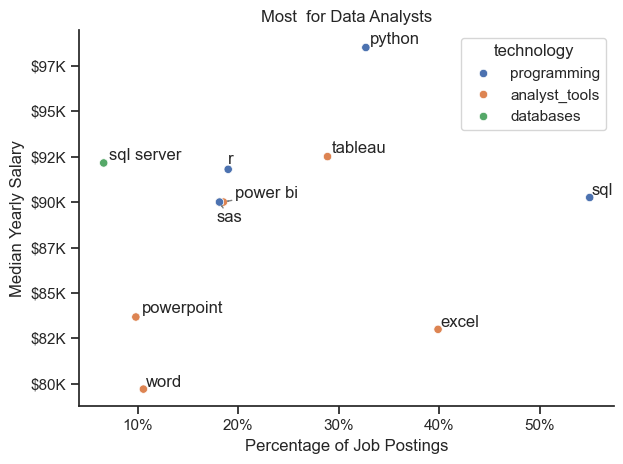

In [90]:
from adjustText import adjust_text
from matplotlib.ticker import PercentFormatter

sns.scatterplot(data=df_plot, x='skill_percentage', y='median_salary', hue='technology')
sns.despine()
sns.set_theme(style='ticks')

texts = []
for i,txt in enumerate(skills_stat.index):
    texts.append(plt.text(skills_stat['skill_percentage'].iloc[i],skills_stat['median_salary'].iloc[i],txt))


adjust_text(texts, arrowprops=dict(arrowstyle='->',color='gray'))
plt.xlabel('Percentage of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Most  for Data Analysts')

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))
plt.tight_layout()
plt.show()

In [76]:
df['job_type_skills'].head(10)

0                                                 None
1    {'analyst_tools': ['power bi', 'tableau'], 'pr...
2    {'analyst_tools': ['dax'], 'cloud': ['azure'],...
3    {'cloud': ['aws'], 'libraries': ['tensorflow',...
4    {'cloud': ['oracle', 'aws'], 'other': ['ansibl...
5    {'cloud': ['gcp'], 'programming': ['python', '...
6    {'cloud': ['gcp', 'bigquery'], 'databases': ['...
7    {'cloud': ['gcp', 'azure', 'aws', 'bigquery', ...
8    {'analyst_tools': ['excel', 'powerpoint', 'pow...
9    {'analyst_tools': ['excel'], 'cloud': ['azure'...
Name: job_type_skills, dtype: object